In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Suraj\.cache\kagglehub\datasets\kazanova\sentiment140\versions\2


In [3]:
import pandas as pd
df = pd.read_csv(f"{path}/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df = df[['sentiment', 'text']]
print(df.head())
print(df.info())

   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [4]:
df['sentiment_label'] = df['sentiment'].map({0: ' Negative', 4: 'Positive'})
print(df[['sentiment', 'sentiment_label']].head())

   sentiment sentiment_label
0          0        Negative
1          0        Negative
2          0        Negative
3          0        Negative
4          0        Negative


In [5]:
# Add tweet length column
df['tweet_length'] = df['text'].apply(len)
print(df[['text', 'tweet_length']].head())

                                                text  tweet_length
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...           115
1  is upset that he can't update his Facebook by ...           111
2  @Kenichan I dived many times for the ball. Man...            89
3    my whole body feels itchy and like its on fire             47
4  @nationwideclass no, it's not behaving at all....           111


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


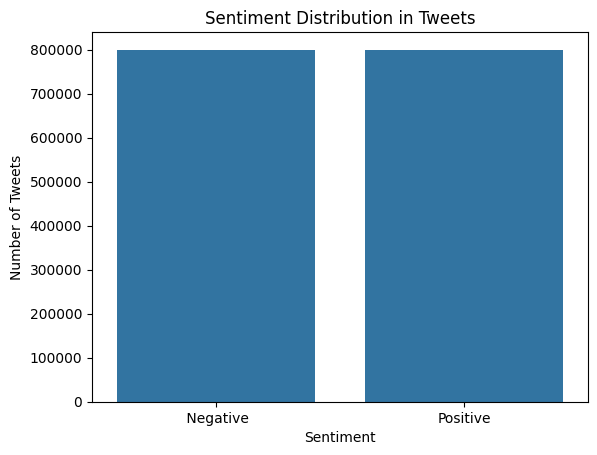

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of sentiment counts
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

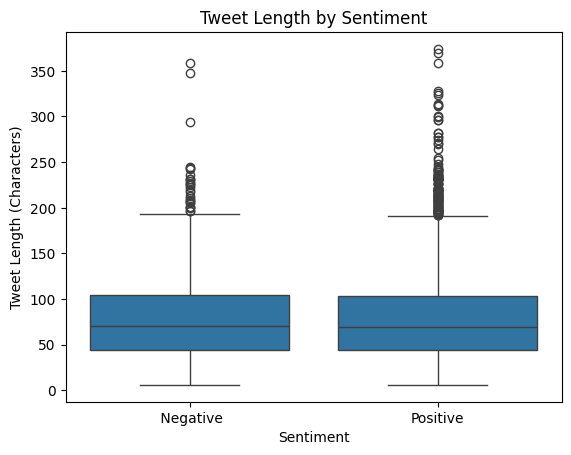

In [8]:
# Box plot of tweet length by sentiment
sns.boxplot(x='sentiment_label', y='tweet_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (Characters)')
plt.show()

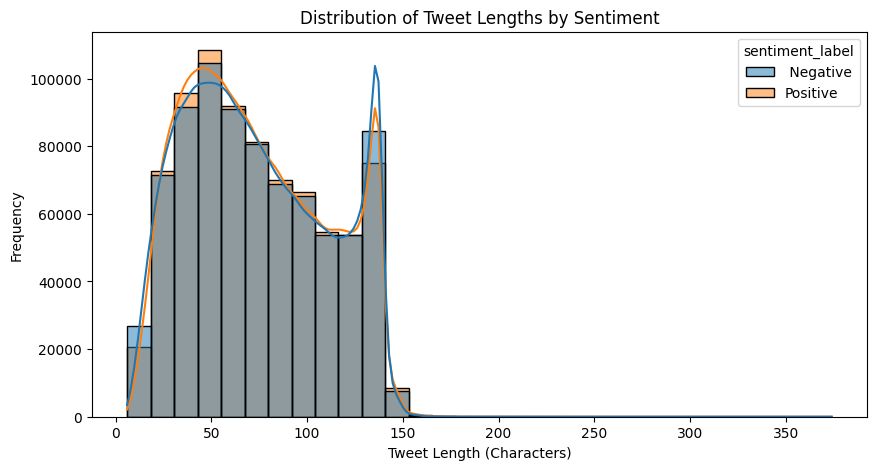

In [9]:
# Histogram of tweet lengths by sentiment
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tweet_length', hue='sentiment_label', bins=30, kde=True)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.show()

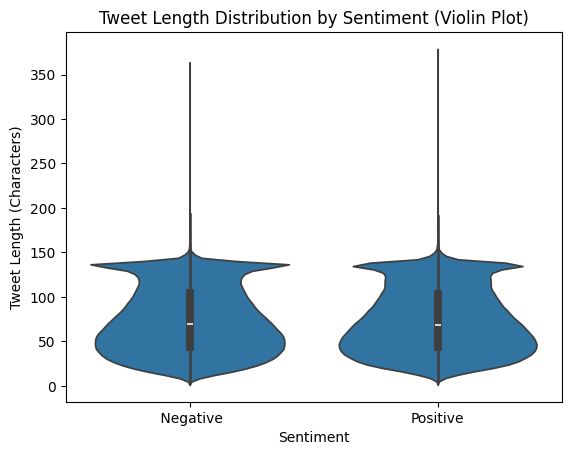

In [10]:
# Violin plot of tweet length by sentiment
sns.violinplot(x='sentiment_label', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Sentiment (Violin Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (Characters)')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


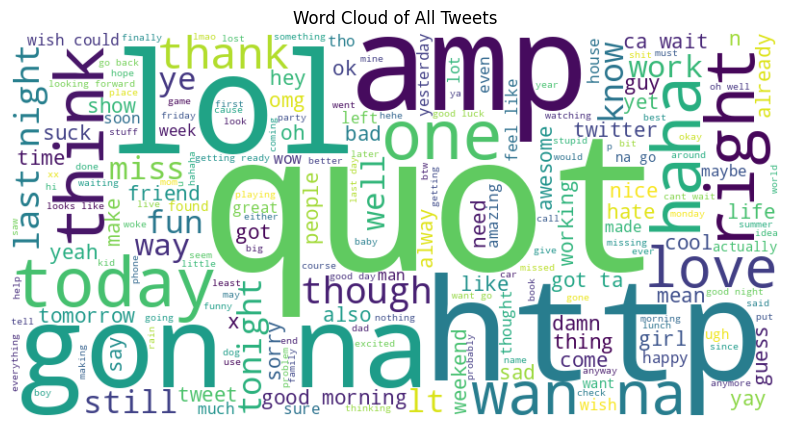

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into one text
all_text = ' '.join(df['text'].str.lower())

# Tokenize and remove stopwords
words = word_tokenize(all_text)
words = [word for word in words if word.isalpha() and word not in stop_words]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()

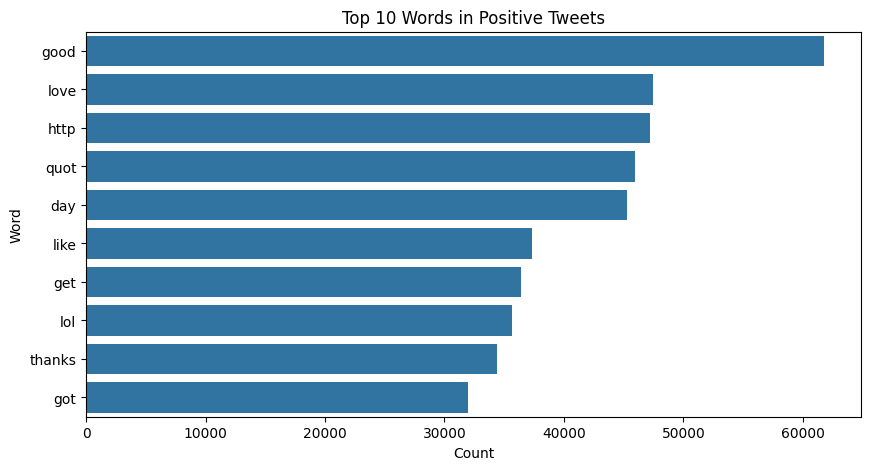

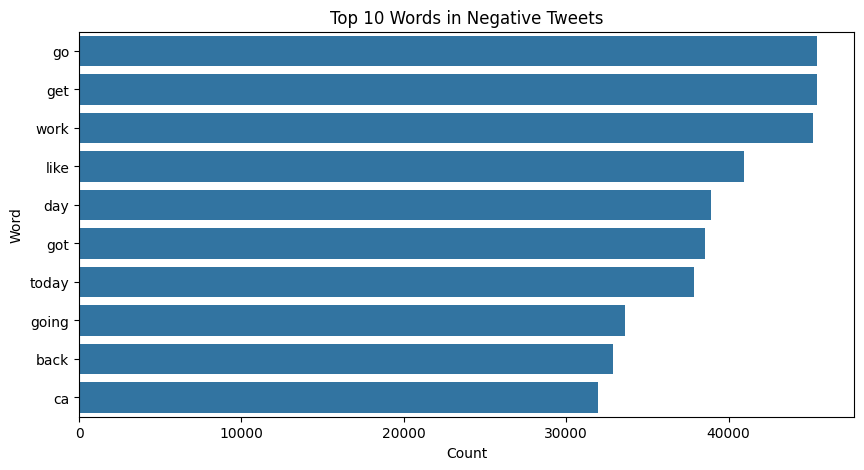

In [12]:
from collections import Counter
import seaborn as sns

# Separate positive and negative tweets
positive_words = ' '.join(df[df['sentiment'] == 4]['text'].str.lower())
negative_words = ' '.join(df[df['sentiment'] == 0]['text'].str.lower())

# Tokenize and remove stopwords
positive_words = [word for word in word_tokenize(positive_words) if word.isalpha() and word not in stop_words]
negative_words = [word for word in word_tokenize(negative_words) if word.isalpha() and word not in stop_words]

# Get top 10 words for each sentiment
positive_freq = Counter(positive_words).most_common(10)
negative_freq = Counter(negative_words).most_common(10)

# Convert to DataFrame for plotting
positive_df = pd.DataFrame(positive_freq, columns=['Word', 'Count'])
negative_df = pd.DataFrame(negative_freq, columns=['Word', 'Count'])

# Plot top words for positive tweets
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=positive_df)
plt.title('Top 10 Words in Positive Tweets')
plt.show()

# Plot top words for negative tweets
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=negative_df)
plt.title('Top 10 Words in Negative Tweets')
plt.show()

In [13]:
import re

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers, keep only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning to the text column
df['cleaned_text'] = df['text'].apply(clean_text)
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0      thats bummer shoulda got david carr third day  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save rest go bounds  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see  


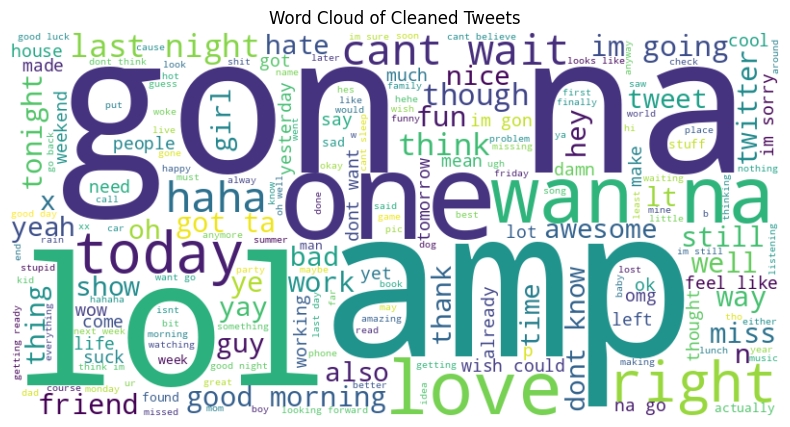

In [14]:
# Word cloud for cleaned text
cleaned_text = ' '.join(df['cleaned_text'])
cleaned_words = word_tokenize(cleaned_text)
cleaned_words = [word for word in cleaned_words if word.isalpha()]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(cleaned_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweets')
plt.show()